In [8]:
import random 
import numpy as np 
import pandas as pd
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline


# Read the preprocessed data

In [3]:
df = pd.read_csv('hotel_data_preprocessed.csv')
df.shape

(3048, 5)

In [4]:
df.head()

,Unnamed: 0,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
0,2041,2013-03-14 11:27:28,206.0,99,1
1,3152,2013-01-03 20:48:24,186.0,6,0
2,5166,2013-01-19 16:51:27,61.0,1,0
3,10135,2013-01-26 11:34:23,72.0,116,0
4,10560,2013-04-29 09:39:50,246.0,245,0


# Visualize the data

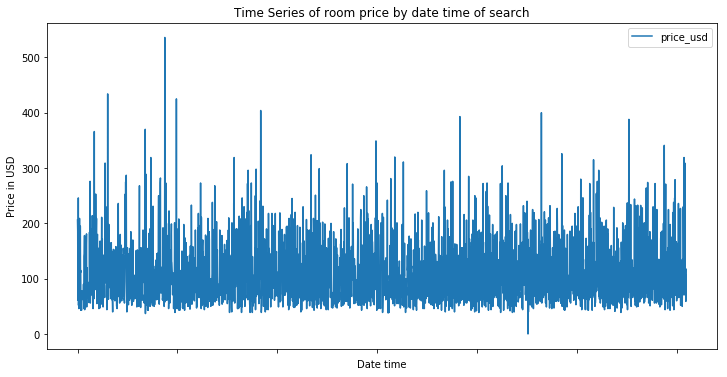

In [5]:
import matplotlib.pyplot as plt
df.plot(x='date_time', y='price_usd', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')
plt.show()

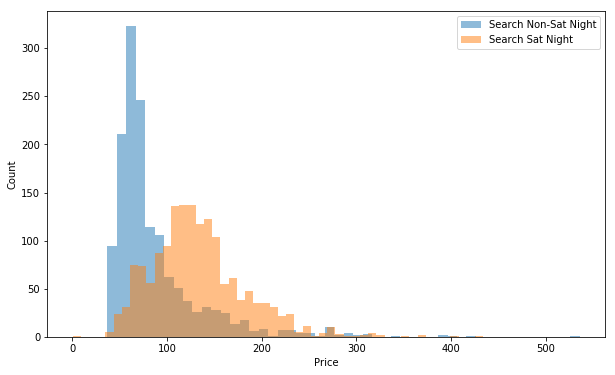

In [6]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins = 50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show();

# Anomaly Detection using Isolation Forests

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


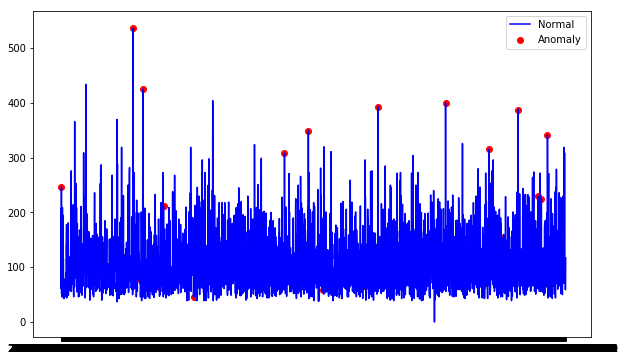

In [12]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=0.01)
model.fit(data) 
df['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['date_time', 'price_usd']] #anomaly

ax.plot(df['date_time'], df['price_usd'], color='blue', label = 'Normal')
ax.scatter(a['date_time'],a['price_usd'], color='red', label = 'Anomaly')
plt.legend()
plt.show();